In [1]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Using TensorFlow backend.


# Use Scikit Learn

In [2]:
from keras.utils import np_utils
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)

In [3]:
x_train=x_train/255
x_test = x_test/255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [8]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

mlp = MLPClassifier(hidden_layer_sizes=(256,128),learning_rate_init = 0.001,batch_size = 512)
# train_sizes, train_scores, valid_scores = learning_curve(mlp, x_train, y_train, cv=2)
history = mlp.fit(x_train,y_train)

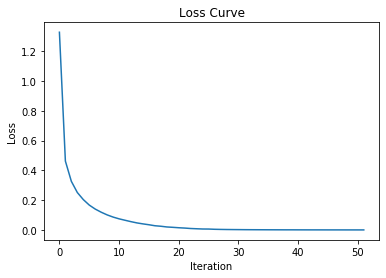

In [23]:
plt.plot(history.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss');

In [12]:
y_pred=mlp.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred,y_test))

0.9718


# Using TensorFlow

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import he_normal
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

output_dim = 10
input_dim = x_train.shape[1]

batch_size = 512
nb_epoch = 20

model_relu = Sequential()
model_relu.add(Dense(256, activation = 'relu', input_shape = (input_dim,), kernel_initializer = he_normal(seed = None)))
model_relu.add(Dense(128, activation = 'relu', kernel_initializer = he_normal(seed = None)))
model_relu.add(Dense(output_dim, activation = 'softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(x_test, y_test))

In [16]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

Test accuracy: 0.982200026512146


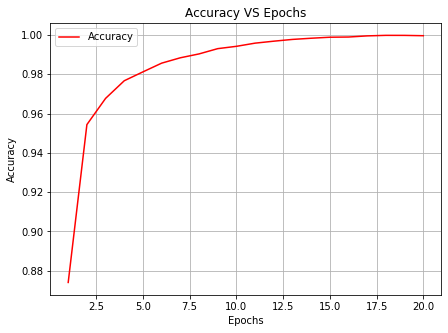

In [17]:
x = list(range(1,nb_epoch+1))

vy = history.history['accuracy']

plt.figure(figsize=(7,5))
plt.plot(x, vy, 'r', label="Accuracy")
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.title('Accuracy VS Epochs')
plt.legend()
plt.grid()
plt.show()